In [1]:
import pandas as pd
import numpy as np
import itertools
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from scipy.spatial import ConvexHull

In [2]:
path = "/content/drive/MyDrive/NSSTC/Fires/2021_04_forestfires.csv"

data = pd.read_csv(path)
data.head(10)

,LATITUDE,LONGITUDE,FRP
0,11.660436,98.765945,3.54
1,11.657220,98.767342,4.13
2,11.590357,98.840027,3.29
3,11.916737,98.813362,0.76
4,11.453232,98.809380,0.93
5,11.757310,98.915451,20.71
6,11.728806,98.931435,16.98
7,10.448758,98.730743,16.38
8,11.682260,98.925758,6.84
9,11.286932,98.864815,3.27


In [3]:
scaler = MinMaxScaler()
scaler.fit(data)
dfs1 = scaler.transform(data)
dfs1 = pd.DataFrame(dfs1)

In [4]:
dfs1.head()

,0,1,2
0,0.079380,0.733922,0.004382
1,0.079200,0.734079,0.005131
2,0.075461,0.742214,0.004064
3,0.093714,0.739229,0.000851
4,0.067792,0.738784,0.001067


In [5]:
print(dfs1.shape)
print('------------------------------------------------')
print(dfs1.isnull().sum())
print('------------------------------------------------')
print(dfs1.describe())

(52035, 3)
------------------------------------------------
0    0
1    0
2    0
dtype: int64
------------------------------------------------
                  0             1             2
count  52035.000000  52035.000000  52035.000000
mean       0.664080      0.430874      0.020604
std        0.158835      0.226570      0.043709
min        0.000000      0.000000      0.000000
25%        0.595282      0.219249      0.003328
50%        0.681155      0.465889      0.006986
75%        0.777478      0.598007      0.017160
max        1.000000      1.000000      1.000000


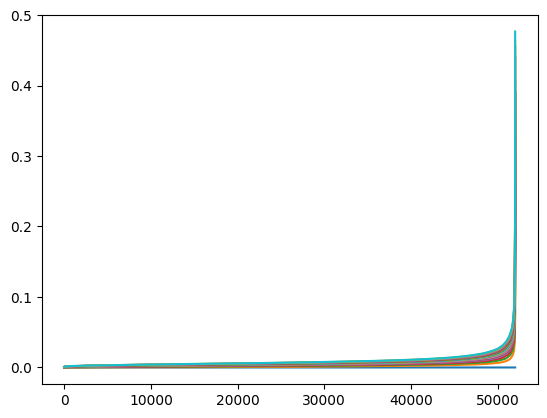

In [ ]:
#determining the episilon value by calculating the average distance between each point 
#in the data set and its 6 nearest neighbors (2 * its dimension)

neighbors = NearestNeighbors(n_neighbors=20)
neighbors_fit = neighbors.fit(dfs1)
distances, indices = neighbors_fit.kneighbors(dfs1)

distances = np.sort(distances, axis=0)
plt.plot(distances);

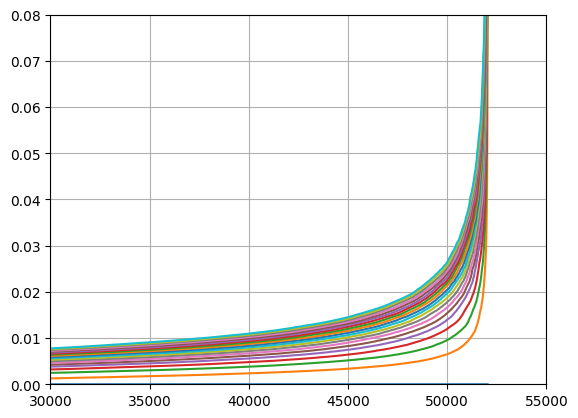

In [ ]:
distances = np.sort(distances, axis=0)
plt.xlim([30000, 55000])
plt.ylim([0, 0.08])
plt.grid(which='major')
plt.plot(distances);

In [ ]:
#eps1=[0.03,0.035,0.04,0.045,0.05,0.055,0.06,0.065,0.07]
eps1=[0.03,0.035,0.04,0.045,0.05,0.055,0.06,0.065,0.07,0.075,0.08]
minpts1=[270,275,280,285]


sil_score1=[]  # empty array for storage
num_clus1 = []
 

for ep, minpt in itertools.product(eps1,minpts1):
    
    
    print(ep,minpt)
    
    db_clus1 = DBSCAN(eps=ep, min_samples= minpt).fit(dfs1)
    
   
    
    if len(np.unique(db_clus1.labels_)) == 1:
        sil_score1.append(-1)
        
    
    else: 
        sil_score1.append(silhouette_score(dfs1, db_clus1.labels_))
    num_clus1.append(len(np.unique(db_clus1.labels_)))



0.03 270
0.03 275
0.03 280
0.03 285
0.035 270
0.035 275
0.035 280
0.035 285
0.04 270
0.04 275
0.04 280
0.04 285
0.045 270
0.045 275
0.045 280
0.045 285
0.05 270
0.05 275
0.05 280
0.05 285
0.055 270
0.055 275
0.055 280
0.055 285
0.06 270
0.06 275
0.06 280
0.06 285
0.065 270
0.065 275
0.065 280
0.065 285
0.07 270
0.07 275
0.07 280
0.07 285
0.075 270
0.075 275
0.075 280
0.075 285
0.08 270
0.08 275
0.08 280
0.08 285


In [ ]:
res1 = pd.DataFrame(list(itertools.product(eps1,minpts1))) 
res1 ['silhouette_score'] = sil_score1
res1 ['num_cluster'] = num_clus1
res1.sort_values (by = 'silhouette_score' , ascending = False)

,0,1,silhouette_score,num_cluster
36,0.075,270,0.295287,3
37,0.075,275,0.291982,3
40,0.080,270,0.291300,2
38,0.075,280,0.291049,3
42,0.080,280,0.290956,2
41,0.080,275,0.290920,2
39,0.075,285,0.290742,3
43,0.080,285,0.289185,2
32,0.070,270,0.278264,3
33,0.070,275,0.278130,3


In [ ]:
res1.sort_values (by = 'silhouette_score' , ascending = False).head(20)

,0,1,silhouette_score,num_cluster
20,0.080,125,0.344761,2
21,0.080,130,0.338678,2
18,0.075,125,0.325548,2
19,0.075,130,0.322594,2
16,0.070,125,0.305694,2
17,0.070,130,0.303648,2
14,0.065,125,0.288879,2
15,0.065,130,0.284516,2
12,0.060,125,0.274892,2
13,0.060,130,0.272635,2


In [6]:
ds1 = DBSCAN (eps= 0.075, min_samples=275).fit(dfs1)
data['DBSCAN_Clusters'] = ds1.labels_

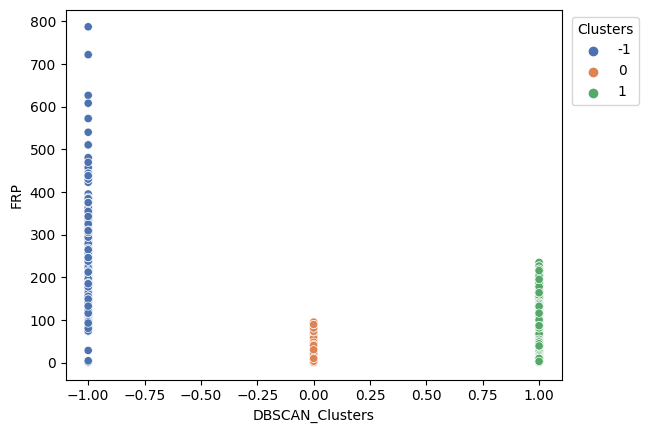

In [ ]:
p = sns.scatterplot(data = data, x = "DBSCAN_Clusters", y = "FRP", hue = ds1.labels_, legend = "full", palette = "deep")
sns.move_legend(p, "upper right", bbox_to_anchor = (1.17, 1.), title = 'Clusters')
plt.show()

In [7]:
data.head(10)

,LATITUDE,LONGITUDE,FRP,DBSCAN_Clusters
0,11.660436,98.765945,3.54,0
1,11.657220,98.767342,4.13,0
2,11.590357,98.840027,3.29,0
3,11.916737,98.813362,0.76,0
4,11.453232,98.809380,0.93,0
5,11.757310,98.915451,20.71,0
6,11.728806,98.931435,16.98,0
7,10.448758,98.730743,16.38,0
8,11.682260,98.925758,6.84,0
9,11.286932,98.864815,3.27,0


In [8]:
outliers_df = data[ds1.labels_ == -1]
clusters_df = data[ds1.labels_ != -1]

colors = ds1.labels_
col_clus = colors[colors != -1]
col_outliers = 'black'

clusters = Counter(ds1.labels_)
print(clusters)
print(data[ds1.labels_==-1].head(10))
print ('Number of Clusters = {}'.format(len(clusters)-1))

Counter({1: 50438, 0: 1035, -1: 562})
      LATITUDE  LONGITUDE     FRP  DBSCAN_Clusters
14   11.978572  98.832497  147.24               -1
53   11.346005  98.996971  393.84               -1
64   11.593282  98.791161  132.38               -1
236  11.936883  98.952339  200.83               -1
306  11.251167  98.946404  180.13               -1
310  11.250590  98.942337  180.13               -1
511  11.881675  99.020340  246.40               -1
515  11.574535  99.106300  126.54               -1
580  11.481838  99.071426  179.05               -1
581  11.482363  99.074982  179.05               -1
Number of Clusters = 2


In [10]:
clusters_df.to_csv(r'/content/drive/MyDrive/NSSTC/Fires/Clusters/MayAg_clusters.csv\AprilFF_clusters.csv', index=False)

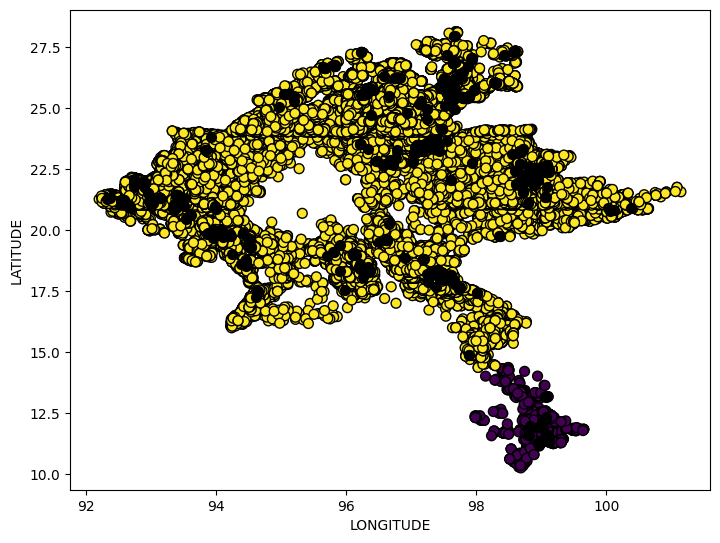

In [ ]:
fig = plt.figure()

ax = fig.add_axes([0.1, 0.1, 1,1])

ax.scatter(clusters_df['LONGITUDE'], clusters_df['LATITUDE'], c=col_clus, edgecolors = 'black', s=50)
ax.scatter(outliers_df['LONGITUDE'], outliers_df['LATITUDE'], c=col_outliers, edgecolors = 'black', s=50)


ax.set_xlabel('LONGITUDE')
ax.set_ylabel('LATITUDE')

#plt.grid(which='major')

plt.show()

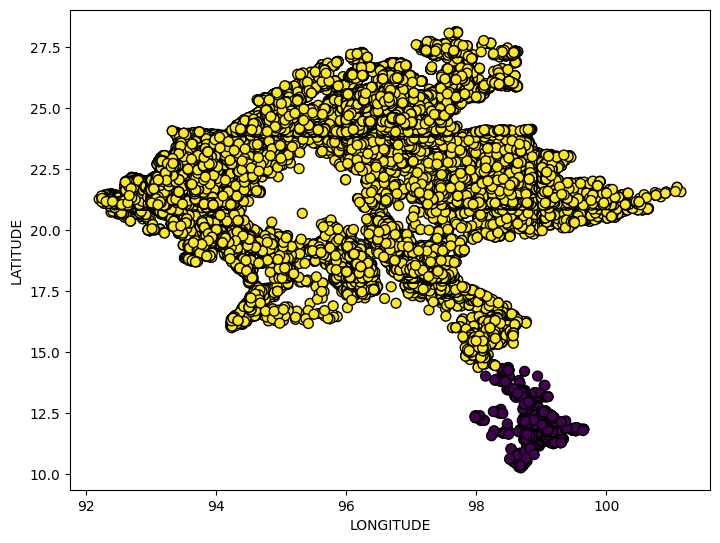

In [ ]:
fig = plt.figure()

ax = fig.add_axes([0.1, 0.1, 1,1])

ax.scatter(clusters_df['LONGITUDE'], clusters_df['LATITUDE'], c=col_clus, edgecolors = 'black', s=50)

for i in data.DBSCAN_Clusters.unique():
    points = data[data.DBSCAN_Clusters == i][['LATITUDE', 'LONGITUDE']].values
    hull = ConvexHull(points)



ax.set_xlabel('LONGITUDE')
ax.set_ylabel('LATITUDE')

#plt.grid(which='major')

plt.show()

In [ ]:
a =data.DBSCAN_Clusters.unique()
s=np.delete(data.DBSCAN_Clusters.unique(), np.where(a == -1))
print(a)
print(s)

[ 0 -1  1]
[0 1]


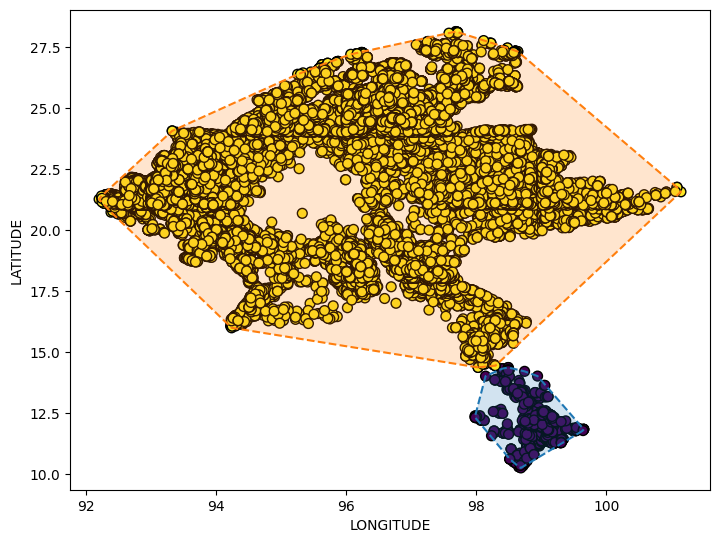

In [ ]:
fig = plt.figure()

ax = fig.add_axes([0.1, 0.1, 1,1])

ax.scatter(clusters_df['LONGITUDE'], clusters_df['LATITUDE'], c=col_clus, edgecolors = 'black', s=50)

# ax.scatter(outliers_df['LONGITUDE'], outliers_df['LATITUDE'], c=col_outliers, edgecolors = 'black', s=50)

a =data.DBSCAN_Clusters.unique()
s=np.delete(data.DBSCAN_Clusters.unique(), np.where(a == -1))

for i in s:
    points = data[data.DBSCAN_Clusters == i][['LATITUDE', 'LONGITUDE']].values

    hull = ConvexHull(points)
   
    vert = np.append(hull.vertices,hull.vertices[0])  # close the polygon by appending the first point at the end

    ax.plot(points[vert, 1], points[vert,0 ], '--')
    ax.fill(points[vert, 1], points[vert, 0], alpha=0.2)
   
ax.set_xlabel('LONGITUDE')
ax.set_ylabel('LATITUDE')

#plt.grid(which='major')

plt.show()

In [ ]:
fig = plt.figure()

ax = fig.add_axes([4, 4, 6, 10])

ax.scatter(clusters_df['LONGITUDE'], clusters_df['LATITUDE'], c=col_clus, edgecolors = 'black', s=70)
#ax.scatter(outliers_df['LONGITUDE'], outliers_df['LATITUDE'], c=col_outliers, edgecolors = 'black', s=50)

a =data.DBSCAN_Clusters.unique()
s=np.delete(data.DBSCAN_Clusters.unique(), np.where(a == -1))

for i in s:
    points = data[data.DBSCAN_Clusters == i][['LATITUDE', 'LONGITUDE']].values
    points = data[data.DBSCAN_Clusters == i][['LATITUDE', 'LONGITUDE']].values
    # get convex hull
    hull = ConvexHull(points)


    vert = np.append(hull.vertices, hull.vertices[0])  # close the polygon by appending the first point at the end
    ax.plot(points[vert, 1], points[vert, 0], '--')
    ax.fill(points[vert, 1], points[vert, 0], alpha=0.2)
   

ax.set_xlabel('LONGITUDE')
ax.set_ylabel('LATITUDE')

#plt.grid(which='major')

plt.show()

Output hidden; open in https://colab.research.google.com to view.